[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Scrap_EDAWoAns.ipynb)

  - Monica Lara Pineda A01655306
- Manuel Ortiz Hernández A01655515
- Omar Alejandro Robledo Rodríguez A01338010
- Diego Ramírez Levy A0136777
- Raúl González Cardona A01654995

<h1><center>Práctica de Módulo 2</center><h1>


## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [314]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
import seaborn as sns

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [4]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [5]:
# Dirección de la página web
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [6]:
# Ejecutar GET-Request
response = requests.get(url)

In [7]:
# Analizar sintácticamente el archivo HTML de BeautifulSoup del texto fuente
soup = BeautifulSoup(response.text, 'html.parser')

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [8]:
main_box = soup.find_all("div", {"class":"_13oc-S"})

In [9]:
len(main_box)

24

In [10]:
box = main_box[0]

In [11]:
box

<div class="_13oc-S"><div data-id="COMFTC4YBSK8WZQC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/dell-xps-core-i5-10th-gen-8-gb-512-gb-ssd-windows-10-home-9300-thin-light-laptop/p/itm7de8623c77dff?pid=COMFTC4YBSK8WZQC&amp;lid=LSTCOMFTC4YBSK8WZQCYL4O3P&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_M1xrFux3%2BDy3kCKhZZmJX79koMHvA%2BEWfhgzqYXl80wrSOgQNREGbdgDHUrtEiXMCqm2arMdVhYnMMXr4AQI%2Fg%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=575fa5smow0000001631666320473&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kf2v3ww0/computer/h/t/m/dell-origin

In [12]:
# Limpiar los rating cuando su valor es nulo
def clean_rating(box, class_type):
    is_null = box.find(attrs={'class': class_type})
    return is_null.text.strip() if (is_null is not None) else "0.0"

In [13]:
# Extraer todos los nombres, precios y ratings del archivo HTML
title = box.find('div', attrs={'class':"_4rR01T"}).text.strip()
price = box.find('div', attrs={'class':"_30jeq3 _1_WHN1"}).text.strip()
rating = clean_rating(box,"_3LWZlK")

In [14]:
print(title,price,rating)

DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin and Light Laptop ₹1,19,990 0.0


In [15]:
name_html = soup.find_all('div', attrs={'class':"_4rR01T"})
price_html = soup.find_all('div', attrs={'class':"_30jeq3 _1_WHN1"})
rating_html = soup.find_all('div', attrs={'class':"_3LWZlK"})

for name_obj in name_html:
    name.append(name_obj.text)
for price_obj in price_html:
    prices.append(price_obj.text)
for rating_obj in rating_html:
    ratings.append(rating_obj.text)

In [16]:
data_list=[]
for box in main_box:
    temp_dict={}
    #completa
    temp_dict['name'] = box.find('div', attrs={'class':"_4rR01T"}).text.strip()
    temp_dict['rating'] = rating = clean_rating(box,"_3LWZlK")
    temp_dict['price'] = box.find('div', attrs={'class':"_30jeq3 _1_WHN1"}).text.strip()
    data_list.append(temp_dict)

In [17]:
print(data_list[0])

{'name': 'DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin and Light Laptop', 'rating': '0.0', 'price': '₹1,19,990'}


### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [18]:
#To show products that only have price and rating
headers = ["Product Name", "Prices", "Ratings"]

with open('./zitate.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, dialect='excel')
    csv_writer.writerow(headers)
    csv_writer.writerows(zip(name, prices, ratings))

In [19]:
#To show all products even if they dont have price or rating
dataset = {'Product Name':name, 'Price':prices, 'Rating':ratings}
df = pd.DataFrame.from_dict(dataset, orient='index')
df.transpose()
df.to_csv('products.csv', index=True, encoding='utf-8')

In [138]:
laptops = pd.DataFrame(data_list)
laptops['price'] = laptops['price'].apply(lambda x: x.lstrip('₹'))

In [139]:
laptops

,name,rating,price
0,DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/W...,0.0,"1,19,990"
1,ASUS VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,3.8,"34,990"
2,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,4.4,"41,990"
3,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,"64,056"
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,"56,990"
5,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"56,990"
6,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"45,990"
7,ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.6,"3,19,990"
8,Lenovo APU Dual Core A9 A99425 - (4 GB/1 TB HD...,4.6,"28,000"
9,HP 15-ec1105AX Ryzen 5 Hexa Core 4600H - (8 GB...,4.5,"59,990"


In [22]:
laptops.to_csv("datos_compus.csv", index=False, encoding='utf-8')

### Paso 5: Un poco de EDA y visualización de este archivo

In [231]:
df = pd.read_csv("datos_compus.csv", sep=None, thousands=',', engine='python')
df['price'] = df['price'].apply(lambda x: int(x.lstrip('₹').replace(',', '')))
df

,name,rating,price
0,DELL XPS Core i5 10th Gen - (8 GB/512 GB SSD/W...,0.0,119990
1,ASUS VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,3.8,34990
2,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,4.4,41990
3,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,64056
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,56990
5,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,56990
6,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,45990
7,ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.6,319990
8,Lenovo APU Dual Core A9 A99425 - (4 GB/1 TB HD...,4.6,28000
9,HP 15-ec1105AX Ryzen 5 Hexa Core 4600H - (8 GB...,4.5,59990


In [232]:
df.shape

(24, 3)

In [233]:
df.dtypes

name       object
rating    float64
price       int64
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [234]:
df[['model','spec']] = df['name'].str.split('-', n=1, expand=True)
del df['name']
df.head()

,rating,price,model,spec
0,0.0,119990,DELL XPS Core i5 10th Gen,(8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Th...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,(4 GB/1 TB HDD/Windows 10 Home) X515JA-BR381T...
2,4.4,41990,HP 14s Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501...
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [235]:
df[['RAM', 'HDD']] = df['spec'].str.split('(', n=1, expand=True)
del df['spec']
df.head()

,rating,price,model,RAM,HDD
0,0.0,119990,DELL XPS Core i5 10th Gen,,8 GB/512 GB SSD/Windows 10 Home) XPS 9300 Thin...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,,4 GB/1 TB HDD/Windows 10 Home) X515JA-BR381T T...
2,4.4,41990,HP 14s Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU...
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,,8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,,8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/...


In [236]:
df[['RAM', 'Hard disk']] = df['HDD'].str.split('/', n=1, expand=True)
del df['HDD']
df.head()

,rating,price,model,RAM,Hard disk
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD/Windows 10 Home) XPS 9300 Thin and ...
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD/Windows 10 Home) X515JA-BR381T Thin a...
2,4.4,41990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin...
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...


Continuemos hasta conseguir lo siguiente...

In [237]:
df[['Storage', 'OS']] = df['Hard disk'].str.split('/', n=1, expand=True)
del df['Hard disk']
df.head()

,rating,price,model,RAM,Storage,OS
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) XPS 9300 Thin and Light Laptop
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home) X515JA-BR381T Thin and Light ...
2,4.4,41990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) 14s- DY2501TU Thin and Light ...
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...


In [238]:
df[['System', 'Other_info']] = df['OS'].str.split('/', n=1, expand=True)
del df['OS']
df.head()

,rating,price,model,RAM,Storage,System,Other_info
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) XPS 9300 Thin and Light Laptop,None
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home) X515JA-BR381T Thin and Light ...,None
2,4.4,41990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) 14s- DY2501TU Thin and Light ...,None
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 10 Home,4 GB Graphics/NVIDIA GeForce GT...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,4 GB Graphics/NVIDIA GeForce ...


### Paso 6: Identificación de valores perdidos 


Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [239]:
df.isnull()

,rating,price,model,RAM,Storage,System,Other_info
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [240]:
df.isnull().sum()

rating         0
price          0
model          0
RAM            0
Storage        0
System         0
Other_info    14
dtype: int64

In [248]:
df['model'].value_counts().count()

23

In [250]:
df['Other_info'].fillna('Not Avaliable Info', inplace=True)

In [226]:
df['model'].value_counts()

DELL Vostro Core i3 10th Gen                       2
DELL XPS Core i5 10th Gen                          1
HP Ryzen 5 Quad Core 3500U                         1
ASUS TUF Gaming F15 Core i5 10th Gen               1
Lenovo IdeaPad 3 Core i3 11th Gen                  1
DELL Inspiron Core i5 11th Gen                     1
DELL Inspiron Ryzen 5 Quad Core 3450U              1
MSI GF65 Thin Hexa Core i5 10th Gen                1
HP 15s Core i3 11th Gen                            1
ASUS VivoBook Flip Ryzen 5 Hexa Core               1
HP 15s Ryzen 3 Dual Core 3250U                     1
DELL Inspiron 7000 Core i5 10th Gen                1
ASUS VivoBook 15 Core i3 10th Gen                  1
Lenovo IdeaPad 3 Core i3 10th Gen                  1
HP 15                                              1
Lenovo APU Dual Core A9 A99425                     1
ALIENWARE Core i9 10th Gen                         1
Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen     1
acer Aspire 7 Core i5 10th Gen                

In [227]:
df[['rating', 'price']].describe(include="all")

,rating,price
count,24.000000,24.000000
mean,4.000000,67863.541667
std,1.250391,59004.860567
min,0.000000,28000.000000
25%,4.200000,41490.000000
50%,4.400000,52490.000000
75%,4.500000,65539.500000
max,4.700000,319990.000000


In [228]:
df.dtypes

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [251]:
df.query('rating  <= 4')# & Age < 40 & JOB.str.startswith("C").values')

,rating,price,model,RAM,Storage,System,Other_info
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) XPS 9300 Thin and Light Laptop,Not Avaliable Info
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home) X515JA-BR381T Thin and Light ...,Not Avaliable Info
11,0.0,69990,DELL Inspiron 7000 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,2 GB Graphics) 7490 Thin and Li...
15,4.0,37379,DELL Vostro Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home) Vostro 3401 Thin and Light La...,Not Avaliable Info
23,4.0,129990,acer Predator Core i7 11th Gen,16 GB,1 TB SSD,Windows 10 Home,6 GB Graphics/NVIDIA GeForce RTX 3060...


In [252]:
df.query('rating  >= 4 & (price>=30000 & price<=40000)')

,rating,price,model,RAM,Storage,System,Other_info
10,4.3,39990,Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home) 15IML05 Thin and Light Laptop,Not Avaliable Info
13,4.2,38499,HP 15s Ryzen 3 Dual Core 3250U,8 GB,1 TB HDD,Windows 10 Home) 15s-GR0011AU Thin and Light L...,Not Avaliable Info
14,4.2,36057,DELL Vostro Core i3 10th Gen,4 GB,256 GB SSD,Windows 10 Home) Vostro 3401 Thin and Light La...,Not Avaliable Info
15,4.0,37379,DELL Vostro Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home) Vostro 3401 Thin and Light La...,Not Avaliable Info


---------

### Visualización de los datos

Realizaremos una gráfica de barras de precio vs rating

<AxesSubplot:title={'center':'Price vs Rating'}, xlabel='price'>

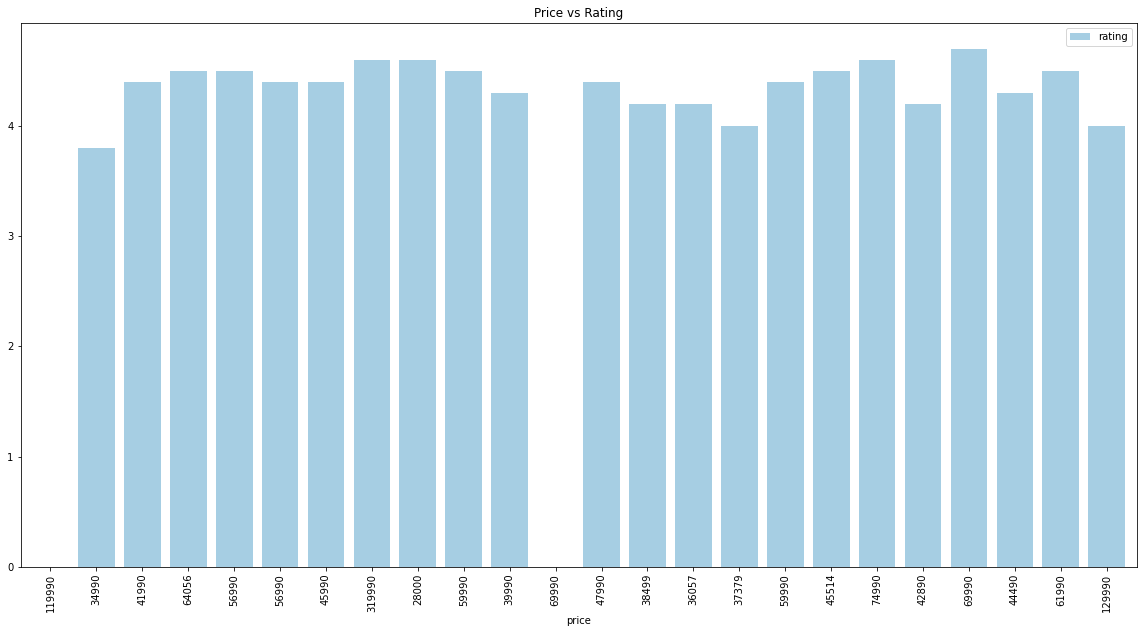

In [307]:
df.plot(x="price", y="rating", kind="bar", title='Price vs Rating', figsize=(20,10), colormap="Paired", width=0.8)


<AxesSubplot:title={'center':'Rating vs Price'}, xlabel='rating'>

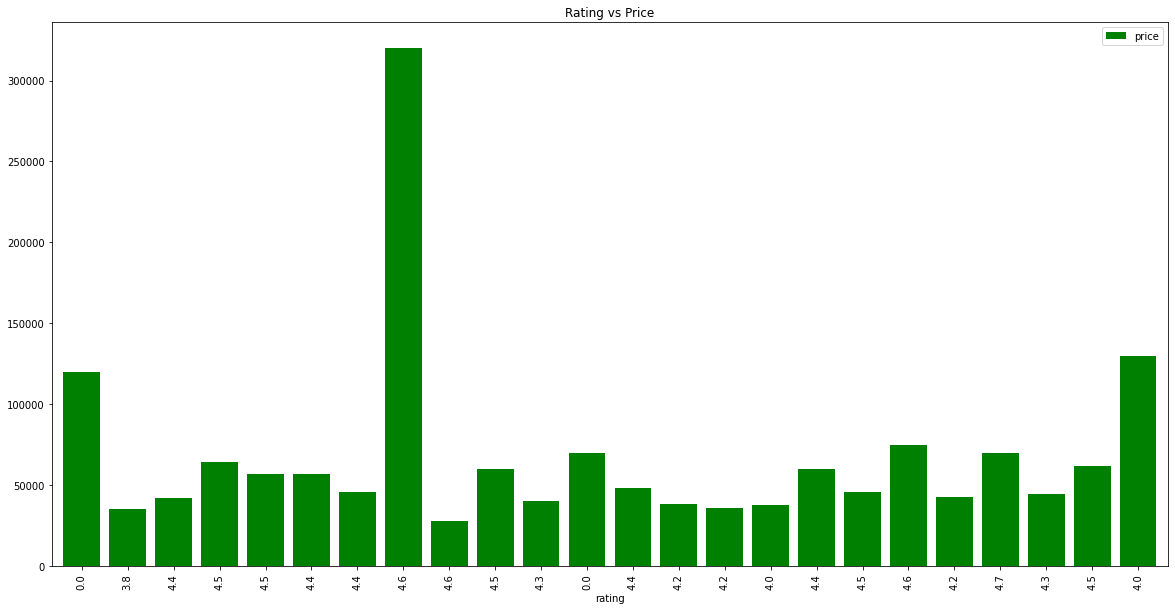

In [377]:
df.plot(x="rating", y="price", kind="bar", title='Rating vs Price', figsize=(20,10), color="green", width=0.8)


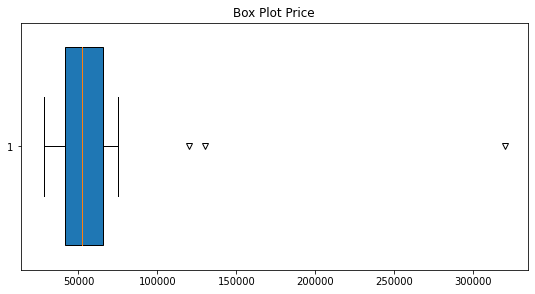

In [414]:
fig = plt.figure(2,figsize=(20, 10))

ax = fig.add_subplot(223)
ax.set_title('Box Plot Price')
# creando el grafico de cajas
bp = ax.boxplot(df['price'], vert=False, patch_artist=True, widths=0.8)

for flier in bp['fliers']:
    flier.set(marker='v', color='red')

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

## ¿Les ha salido algún discordante visual a ustedes?

In [415]:
df.head()

,rating,price,model,RAM,Storage,System,Other_info
0,0.0,119990,DELL XPS Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) XPS 9300 Thin and Light Laptop,Not Avaliable Info
1,3.8,34990,ASUS VivoBook 15 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home) X515JA-BR381T Thin and Light ...,Not Avaliable Info
2,4.4,41990,HP 14s Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) 14s- DY2501TU Thin and Light ...,Not Avaliable Info
3,4.5,64056,HP Pavilion Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 10 Home,4 GB Graphics/NVIDIA GeForce GT...
4,4.5,56990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,4 GB Graphics/NVIDIA GeForce ...


### ¿Para ustedes, cuáles fueron las computadoras más caras?

Las predator

----
----
----

<h1><center>Monte Carlo</center><h1>

### ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, entonces 10 se contará como un número impar, y si apostamos a los impares, entonces 11 se contará como un número par.
 * Si apostamos a números pares y obtenemos 10, perdemos.
 * Si apostamos a números impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librerías

In [564]:
import random
import matplotlib.pyplot as plt

### Creación de las apuestas del jugador

In [599]:

#Player bet
choice = input("Deseas apostar a pares o impares? \n")
#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100) 
        if note == 10:
            return False
        elif (note%2)==0:
            return True
        else:
            return False

elif choice == "Odd":
    def pickNote():
        note = random.randint(1,100)
        if note == 11:
            return False
        elif (note%2)==0:
            return False
        else:
            return True

Deseas apostar a pares o impares? 
 Par


### Función principal

In [600]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money= total_money + bet_money
            num_plays.append(play)
            money.append(total_money)
        else:
            total_money= total_money - bet_money
            num_plays.append(play)
            money.append(total_money)
  
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(num_plays, money)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

[9400]
9400
El jugador empezó con $ 10,000
El jugador se fue con $ 9400.0


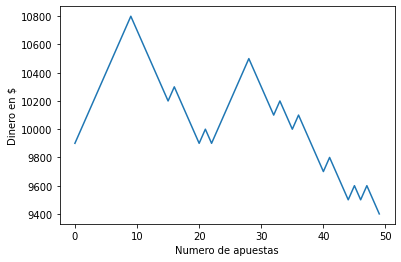

In [603]:
final_funds = []

ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $ 10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

In [604]:
def start_beting(bets):
    final_funds = []
    ending_fund = 0
    for i in range(1000):
        ending_fund = play(10000, 100, bets)

    print("El jugador empezó con $ 10,000")
    print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

El jugador empezó con $ 10,000
El jugador se fue con $ 9988.011988011987


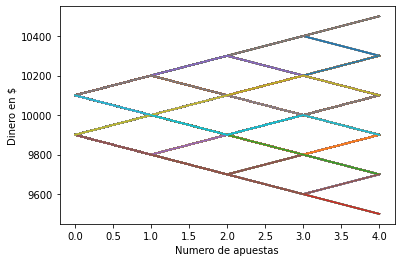

In [605]:
start_beting(5)

El jugador empezó con $ 10,000
El jugador se fue con $ 9984.707646176912


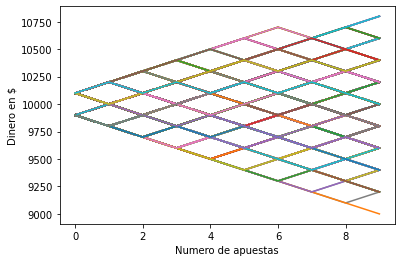

In [606]:
start_beting(10)

El jugador empezó con $ 10,000
El jugador se fue con $ 9329.890036654448


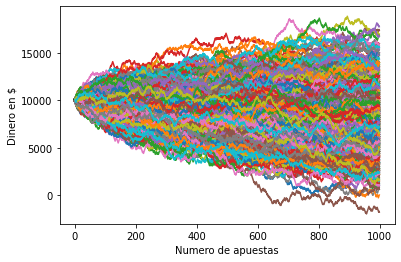

In [607]:
start_beting(1000)

El jugador empezó con $ 10,000
El jugador se fue con $ 4429.642589352662


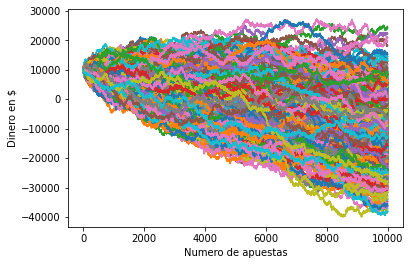

In [608]:
start_beting(10000)

### ¿Qué conclusiones puedes inferir a partir del ejercicio anterior?

Mientras el jugador haga menos apuestas, tiene más probabilidad de obtener una ganancia o perder menos dinero, en cambio, cuando más número de apuestas hace el jugador, el resultado negativo es más probable

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la simulación de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulación de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.